# Plot fig. 7.8

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as pl
import os
from matplotlib import gridspec, rc
from matplotlib.lines import Line2D
import matplotlib.patches as mp
from netCDF4 import Dataset
import warnings
from matplotlib.ticker import AutoMinorLocator

from ar6.utils.h5 import *

In [2]:
# TODO - sort out figure sizing

pl.rcParams['figure.figsize'] = (9/2.54, 9/2.54)
pl.rcParams['font.size'] = 9
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['figure.dpi'] = 150

In [3]:
results = load_dict_from_hdf5('../data_input_large/ERF_leave_one_out.h5')

/nfs/b0110/Users/mencsm/ar6/src/ar6/utils/h5.py:43: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


In [4]:
AR6_forc = {}
forcings = ['co2', 'ch4', 'n2o', 'other_wmghg', 'o3', 'h2o_stratospheric',
            'contrails', 'aerosol-radiation_interactions', 'aerosol-cloud_interactions', 
            'bc_on_snow', 'land_use', 'volcanic', 'solar']
for forcing in forcings:
    AR6_forc[forcing] = np.zeros(5)
    AR6_forc[forcing] = np.percentile(results['AR6-historical']['surface_temperature'] - results['remove_%s' % forcing]['surface_temperature'], (5,16,50,84,95), axis=1)
    
# aggregated categories
aerosol = (
    results['AR6-historical']['surface_temperature'] - results['remove_aerosol-cloud_interactions']['surface_temperature'] +
    results['AR6-historical']['surface_temperature'] - results['remove_aerosol-radiation_interactions']['surface_temperature']
)
AR6_forc['aerosol'] = np.percentile(aerosol, (5,16,50,84,95), axis=1)

other_anth = (
    results['AR6-historical']['surface_temperature'] - results['remove_h2o_stratospheric']['surface_temperature'] +
    results['AR6-historical']['surface_temperature'] - results['remove_contrails']['surface_temperature'] +
    results['AR6-historical']['surface_temperature'] - results['remove_land_use']['surface_temperature'] +
    results['AR6-historical']['surface_temperature'] - results['remove_bc_on_snow']['surface_temperature']
)
AR6_forc['other_anth'] = np.percentile(other_anth, (5,16,50,84,95), axis=1)

anthro = (
    results['AR6-historical']['surface_temperature'] - results['remove_co2']['surface_temperature'] +
    results['AR6-historical']['surface_temperature'] - results['remove_ch4']['surface_temperature'] +
    results['AR6-historical']['surface_temperature'] - results['remove_n2o']['surface_temperature'] +
    results['AR6-historical']['surface_temperature'] - results['remove_other_wmghg']['surface_temperature'] +
    results['AR6-historical']['surface_temperature'] - results['remove_o3']['surface_temperature'] +
    results['AR6-historical']['surface_temperature'] - results['remove_h2o_stratospheric']['surface_temperature'] +
    results['AR6-historical']['surface_temperature'] - results['remove_contrails']['surface_temperature'] +
    results['AR6-historical']['surface_temperature'] - results['remove_aerosol-radiation_interactions']['surface_temperature'] +
    results['AR6-historical']['surface_temperature'] - results['remove_aerosol-cloud_interactions']['surface_temperature'] +
    results['AR6-historical']['surface_temperature'] - results['remove_bc_on_snow']['surface_temperature'] +
    results['AR6-historical']['surface_temperature'] - results['remove_land_use']['surface_temperature']
)
AR6_forc['anthro'] = np.percentile(anthro, (5,16,50,84,95), axis=1)

AR6_forc['total'] = np.percentile(results['AR6-historical']['surface_temperature'], (5,16,50,84,95), axis=1)

In [5]:
colors = {
    'co2': '#7f0089',
    'ch4': '#ad5e00',
    'n2o': '#008e83',
    'ghg': '#0070c0',
    'o3': '#66665f',
    'aerosols': '#e5da47',
    'other_anth': '#c0f080',
    'anthro' : '#000000',
    'volcanic': '#006000',
    'solar': '#d0a070',  
}

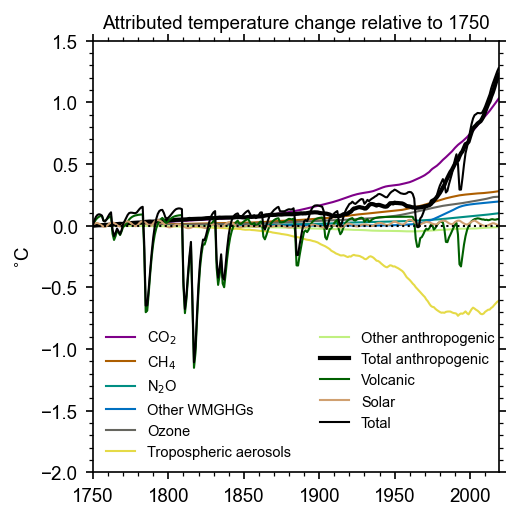

In [6]:
fig, ax = pl.subplots()

year = np.arange(1750, 2020)

ax.plot(year, AR6_forc['co2'][2], label='CO$_2$', color=colors['co2'], lw=1)
ax.plot(year, AR6_forc['ch4'][2], label='CH$_4$', color=colors['ch4'], lw=1)
ax.plot(year, AR6_forc['n2o'][2], label='N$_2$O', color=colors['n2o'], lw=1)
ax.plot(year, AR6_forc['other_wmghg'][2], label='Other WMGHGs', color=colors['ghg'], lw=1)
ax.plot(year, AR6_forc['o3'][2], label='Ozone', color=colors['o3'], lw=1)
ax.plot(year, AR6_forc['aerosol'][2], label='Tropospheric aerosols', color=colors['aerosols'], lw=1)
ax.plot(year, AR6_forc['other_anth'][2], label='Other anthropogenic', color=colors['other_anth'], lw=1)
ax.plot(year, AR6_forc['anthro'][2], color='k', lw=2, label='Total anthropogenic')
ax.plot(year, AR6_forc['volcanic'][2], label='Volcanic', color=colors['volcanic'], lw=1)
ax.plot(year, AR6_forc['solar'][2], label='Solar', color=colors['solar'], lw=1)
ax.plot(year, AR6_forc['total'][2], color='k', lw=1, label='Total')

ax.axhline(0, color='k', ls=':', lw=1)
ax.set_xlim(1750,2019)
ax.set_ylim(-2, 1.5)

ax.legend(ncol=2, fontsize=7, frameon=False)

ax.set_title('Attributed temperature change relative to 1750', fontsize=9)
ax.set_ylabel('$^{\circ}$C')

ticklabels = ax.get_xticklabels()
ticklabels = ax.get_yticklabels()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

pl.tight_layout()
pl.savefig('../figures/fig7.8.png')
pl.savefig('../figures/fig7.8.pdf')